In [7]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel("/Users/marclambertes/Downloads/xG 04022025.xlsx")

# Filter the DataFrame for the relevant 'Type_of_play'
types_of_play = ["FromCorner"]
filtered_df = df[df['Type_of_play'].isin(types_of_play)]

# Ensure 'isGoal' is boolean (if stored as 0/1 or string)
filtered_df['isGoal'] = filtered_df['isGoal'] == True  # Convert to boolean explicitly

# Group by 'TeamId' and aggregate values
team_stats = filtered_df.groupby('TeamId').agg(
    xG=('xG', 'sum'),
    PsxG=('PsxG', 'sum'),
    Goals=('isGoal', lambda x: (x == True).sum())  # Explicitly count True values
)

# Save the result to an Excel file
output_path = "/Users/marclambertes/Downloads/team_xg_output.xlsx"
team_stats.to_excel(output_path)

# Print the path to the saved file
print(f"Excel file saved at: {output_path}")


/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_18916/4021353819.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['isGoal'] = filtered_df['isGoal'] == True  # Convert to boolean explicitly


Excel file saved at: /Users/marclambertes/Downloads/team_xg_output.xlsx


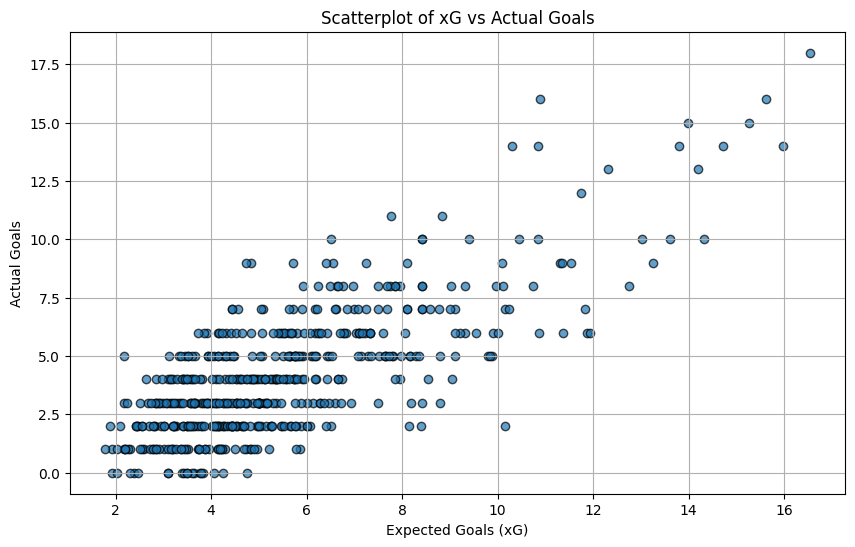

In [9]:
import matplotlib.pyplot as plt

# Create scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(team_stats['xG'], team_stats['Goals'], alpha=0.7, edgecolors='black')

# Labeling
plt.xlabel("Expected Goals (xG)")
plt.ylabel("Actual Goals")
plt.title("Scatterplot of xG vs Actual Goals")
plt.grid(True)

# Show the scatterplot
plt.show()